Chapter 13
# 鸢尾花样本数据到图，展示分类标签
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
# 加载鸢尾花数据集
iris = load_iris()
data = iris.data[:, :2] 
label = iris.target

In [3]:
# 计算欧氏距离矩阵
D = euclidean_distances(data)
# 用成对距离矩阵可以构造无向图

In [4]:
# 创建无向图
G = nx.Graph(D, nodetype=int)

# 提取边的权重，即欧氏距离值
edge_weights = [G[i][j]['weight'] for i, j in G.edges]

In [5]:
# 使用鸢尾花数据的真实位置绘制图形
pos = {i: (data[i, 0], data[i, 1]) for i in range(len(data))}

In [6]:
# 选择需要保留的边

edge_kept = [(u, v) 
             for (u, v, d) 
             in G.edges(data=True) 
             if d["weight"] <= 0.5]

In [7]:
# 节点颜色映射

color_mapping = {0: '#0099FF', 
                 1: '#FF6600', 
                 2: '#99FF33'}

# 完成每个节点的颜色映射
node_color = [color_mapping[label[n]] 
               for n in G.nodes()]

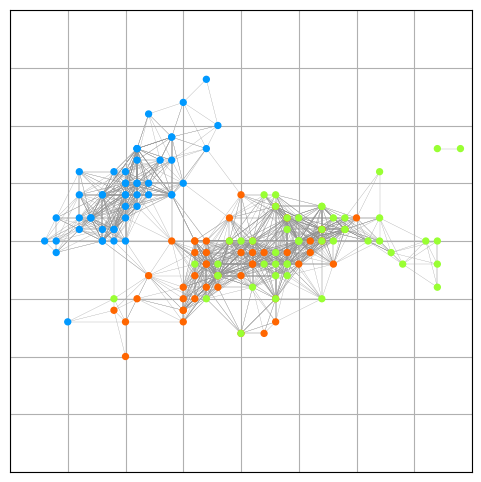

In [8]:
# 绘制无向图，分别绘制边和节点

fig, ax = plt.subplots(figsize = (6,6))

nx.draw_networkx_edges(G, pos, 
                       edgelist=edge_kept, 
                       width = 0.2,
                       edge_color='0.58')

nx.draw_networkx_nodes(G, pos, node_size = 18,
                       node_color=node_color)


ax.set_xlim(4,8)
ax.set_ylim(1,5)
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.savefig('鸢尾花_欧氏距离矩阵_无向图，展示分类标签.svg')